# Восстановление золота из руды

Требуется построить модель, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды (сразу 2 параметра).

### Описание данных  
#### Технологический процесс  
* 		Rougher feed — исходное сырье
* 		Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    * 		Xanthate **— ксантогенат (промотер, или активатор флотации);
    * 		Sulphate — сульфат (на данном производстве сульфид натрия);
    * 		Depressant — депрессант (силикат натрия).
* 		Rougher process (англ. «грубый процесс») — флотация
* 		Rougher tails — отвальные хвосты
* 		Float banks — флотационная установка
* 		Cleaner process — очистка
* 		Rougher Au — черновой концентрат золота
* 		Final Au — финальный концентрат золота
Параметры этапов  
* 		air amount — объём воздуха
* 		fluid levels — уровень жидкости
* 		feed size — размер гранул сырья
* 		feed rate — скорость подачи


#### Наименование признаков   


Наименование признаков должно быть такое:  
[этап].[тип_параметра].[название_параметра]  
Пример: rougher.input.feed_ag  
Возможные значения для блока [этап]:  
* 		rougher — флотация
* 		primary_cleaner — первичная очистка
* 		secondary_cleaner — вторичная очистка
* 		final — финальные характеристики
Возможные значения для блока [тип_параметра]:
* 		input — параметры сырья
* 		output — параметры продукта
* 		state — параметры, характеризующие текущее состояние этапа
* 		calculation — расчётные характеристики


Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.  
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.  
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.  



In [123]:
import pandas as pd

train = pd.read_csv('/Users/alexey_zalesov/Desktop/ya_prakrikum/ds/datasets/gold_recovery_train_new.csv')
full  = pd.read_csv('/Users/alexey_zalesov/Desktop/ya_prakrikum/ds/datasets/gold_recovery_full_new.csv')
test = pd.read_csv('/Users/alexey_zalesov/Desktop/ya_prakrikum/ds/datasets/gold_recovery_test_new.csv')



In [124]:
display(train.head())
train.describe()


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [125]:
%time

train.info()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output

In [126]:
display(full.head())
full.describe()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [127]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [128]:
display(test.head())
test.describe()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

### Предварительный анализ

Предоставлено три таблицы - train, test и full (из которой состоят первые 2). В каждой есть пропуски, возможно, получится их удалить. В качестве индекса используется дата, тип данных - object. В дальнейшем для обучения модели этот столбец необходимо удалить, а при анализе - изменить тип данных или вообще придумать новый индекс. 

1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для   

признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

#### Проверим, что эффективность обогащения рассчитана правильно:

In [130]:
#считаем наши значения:

train['rougher.output.recovery.new ']  = (train['rougher.output.concentrate_au']*
                                          (train['rougher.input.feed_au']-train['rougher.output.tail_au']))/(train['rougher.input.feed_au']*(train['rougher.output.concentrate_au']-
                                        train['rougher.output.tail_au']))*100





In [131]:
from sklearn.metrics import mean_absolute_error


score = mean_absolute_error(train['rougher.output.recovery.new '],train['rougher.output.recovery'] )

print('Средняя абсолютная ошиюбка между заново посчитанными значениями и предоставленными:', score)



Средняя абсолютная ошиюбка между заново посчитанными значениями и предоставленными: 9.682896147825551e-15


Значение MAE крайне мало, можно заключить, что в предоставленных данных значение train['rougher.output.recovery'] посчитано верно. 

### Анализ пропущенных столюцов тестовой выборки:

#### Найдем количество и сами пропущенные столбцы:

In [132]:
diff = set(train.columns) - set(test.columns)

print('Количество пропущенных столбцов:', len(diff),'\n')
print(diff)

Количество пропущенных столбцов: 35 

{'final.output.concentrate_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.recovery.new ', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_au', 'final.output.concentrate_sol', 'rougher.output.tail_ag', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'final.output.tail_ag', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_pb', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_au', 'rougher.calculation.au_pb_ratio', 'primary_cleaner.output.concentrate_au', 'final.output.tail_pb', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.tail_sol', 'rougher.output.recovery', 'secondary_cleaner.output.tail_ag', 'rougher.output.tail_pb', 'primary_cleaner.output.tail_sol', 'final.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 'final.

В основном отсутствуют финальные значения (.output и .final ) производственной цепочки, а также целевые признаки: "final.output.recovery" и "rougher.output.recovery". Все столбцы типа данных "float64"

### Предобработка данных

Так как в таблице "full" содержится наиболее полная информация, займемся ею, а после и при необходимости будет изменять оставшиеся, используя измененный столбец даты, как индекс.

In [133]:
#заменим тип данных в стобцах будущего индекса (даты):

full['date']=pd.to_datetime(full['date'], format='%Y-%m-%dT%H:%M:%S')
train['date']=pd.to_datetime(train['date'], format='%Y-%m-%dT%H:%M:%S')
test['date']=pd.to_datetime(test['date'], format='%Y-%m-%dT%H:%M:%S')


#2016-09-01 00:59:59

display(full.head())
print(type(full['date'][1]))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Посчитаем пропуски, возможно получится удалить:

In [134]:
full.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.state.floatbank10_e_level              0
rougher.state.floatbank10_f_air                0
rougher.output.concentrate_pb                  0
rougher.state.floatbank10_f_level              0
date                                           0
Length: 87, dtype: int64

In [135]:
train.isna().sum().sort_values(ascending=False).head(15)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
rougher.input.feed_pb                        100
primary_cleaner.input.xanthate               100
final.output.tail_pb                         100
primary_cleaner.output.concentrate_pb         86
rougher.input.feed_sol                        78
primary_cleaner.output.tail_sol               46
rougher.input.floatbank11_sulfate             36
primary_cleaner.input.depressant              32
dtype: int64

In [136]:
test.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.sulfate                  4
primary_cleaner.input.xanthate                 4
secondary_cleaner.state.floatbank2_a_air       3
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank6_a_level     0
rougher.input.floatbank10_xanthate             0
rougher.input.feed_au                          0
rougher.input.feed_pb                          0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.state.floatbank10_a_level              0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.stat

Отдельно посчитаем возможные пропуски с целевыми признаками в "train" и "full" (в "test" их нет)  
#final.output.recovery" и "rougher.output.recovery"

In [137]:
print(full['final.output.recovery'].isna().sum(), full['rougher.output.recovery'].isna().sum())

0 0


In [138]:
print(train['final.output.recovery'].isna().sum(), train['rougher.output.recovery'].isna().sum())

0 0


Если посмотреть на столбец ['date_time_index'], то мы увидим, что строки идут хронологически друг за другом с разницей в один час. Поэтому пропущенные значения (наибольшее количество пропусков в столбце "secondary_cleaner.output.tail_sol" менее 10% от общего числа строк), поэтому пропущщенные значения можно заменить соседними(ближайшими непропущенными) значениями методом 'ffill'.

In [139]:
full = full.fillna(method='ffill')
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

test.isna().sum().sort_values(ascending=False)

secondary_cleaner.state.floatbank6_a_level    0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_a_air               0
rougher.input.floatbank11_xanthate            0
rougher.input.floatbank11_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank10_sulfate             0
rougher.input.feed_au                         0
rougher.input.feed_sol                        0
rougher.input.feed_size                       0
rougher.input.feed_rate                       0
rougher.input.feed_pb                         0
rougher.input.feed_ag                         0
primary_cleaner.state.floatbank8_d_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_a_air  

In [140]:
#подготовит целевые признаки обучающей выборки:

target_train_rought=train['rougher.output.recovery']
target_train_final = train['final.output.recovery']
target= [target_train_rought, target_train_final]
print(target[0].shape)
#подготовим признаки для обучающей выборки - удалим отсутствующие в "test" столбцы, 
#в них также входит целевой признак

features_train = train.drop(diff, axis=1) 










#Вот что попробовал сделать:



df_for_join = full[['final.output.recovery','rougher.output.recovery', 'date']]

test_with_target = pd.merge(test, df_for_join, on='date')

#print(df_for_join.info())

#print(test.info())
#проверил, что типы данных совпадают, но вылетала ошибка 
#You are trying to merge on datetime64[ns] and int64 columns. If you wish to proceed you should use pd.concat 

#print(test.columns)


#test_with_target = test.join(df_for_join)




#test_with_target = test.join(full['rougher.output.recovery'])
#test_with_target = test_with_target.join(full['final.output.recovery'])

print(test_with_target.shape)
#сработало!

target_test_rough = test_with_target['rougher.output.recovery']
target_test_final = test_with_target['final.output.recovery']
target_test = test_with_target[['rougher.output.recovery','final.output.recovery']]
#print(target_test.shape)
#print()
#print(features_train.shape)
#print()
#print(target_test.shape)

#(5290, 55)

(14149,)
(5290, 55)


In [141]:
#df_for_join = full[['final.output.recovery','rougher.output.recovery', 'date']]
#df_for_join.columns = ['final.output.recovery','rougher.output.recovery', 'date1']
#test_with_target = test.join(full['rougher.output.recovery'], on='date')

#пробовал изменить названия столбцов, но не помогает. 
#при этом, вроде ошибки при  просто 'join' не возникало

### Вывод

Данные очищены, таблица train и test приведены к одинаковому виду, выделены таблицы-признаки и таблицы с целевым признаком для обучающей и тестовой выборок.

## Анализ данных

#### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Нужно исследовать значения концентрации данных металлов на каждой стадии: до обработки, после флотации, после первого этапа очистки, после второго этапа очистки. Интересующие нас столбцы степеней очистки содержат строку 'concentrate' в названии. А столбцы начала техпроцесса: 'input.feed'. Столбцы возьмем из таблицы "full", тк она наиболее полная.

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au']

In [142]:
columns = full.columns

col_names = [i for i in columns if 'concentrate' in i] + [i for i in columns if 'rougher.input.feed' in i]

In [143]:
print(col_names)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au']


In [144]:
#Выделяем нужные нам металлы:

columns_au_ag_pb = [i for i in col_names if 'au' in i or 'ag' in i or 'pb' in i]
print(columns_au_ag_pb)

#перевернем для хронологии
columns_au_ag_pb.reverse()

print(columns_au_ag_pb)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']
['rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_ag']


'rougher.calculation.sulfate_to_au_concentrate' получился лишний - нам это соотношение не нужно. 

In [145]:
columns_au_ag_pb.remove('rougher.calculation.sulfate_to_au_concentrate')

print(columns_au_ag_pb)


['rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_ag']


In [146]:
#разбиваем на металл (Au, Ag, Pb):


columns_au = [i for i in columns_au_ag_pb if 'au' in i]
columns_ag = [i for i in columns_au_ag_pb if 'ag' in i]
columns_pb = [i for i in columns_au_ag_pb if 'pb' in i]

print(columns_au)
print(columns_ag)
print(columns_pb)



['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']


In [147]:
au = full[columns_au]
ag = full[columns_ag]
pb = full[columns_pb]

display(au.head())

type(au)

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


pandas.core.frame.DataFrame

Ура!

In [148]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


def analysis_metal(data):
    mean_values = []
    columns = data.columns
    for column in range(len(columns)):
        mean = data[columns[column]].mean()
        mean_values.append(mean)
        data[columns[column]].hist(alpha=0.65)
    plt.xlabel("Количество концентрата, у.е.")
    plt.ylabel("Частота")
    print('Cредние значения концентрата в техпроцессе','\n',
          'в хронологическом порядке:', mean_values)
    plt.title('Распределение')
    plt.show()



Cредние значения концентрата в техпроцессе 
 в хронологическом порядке: [8.266097326589135, 19.772000139486334, 32.1194004078766, 44.076512941952664]


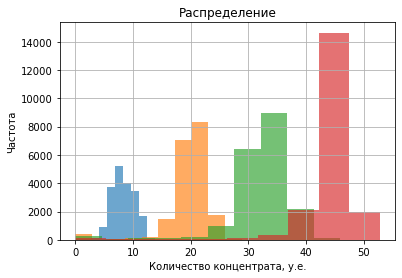

In [149]:
analysis_metal(au)

Исходя из графика видно, что концентрат золота показывает обогащение в 5,5 раз в ходе техпроцесса. Рост есть на каждом из этапов. Так как задача по условию обогащение именно золота - фирма движется в правильном направлении. 

Cредние значения концентрата в техпроцессе 
 в хронологическом порядке: [8.7949274258147, 11.994759359873452, 8.442408077719056, 5.168386967510268]


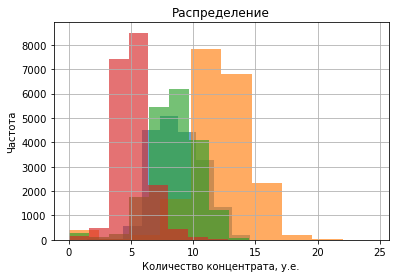

In [150]:
analysis_metal(ag)

Количество концентрата серебра в итоге уменьшается... Стоит обратить на это внимание заказчика. 
Концентрация серебра увеличивается на этапе первичной обработки, затем снижается во время вторичной очистки, скорее всего это связано с особенностями обработки, в итоге среднее количества концентрата меньше поступившего в 1.61 раза. 

Cредние значения концентрата в техпроцессе 
 в хронологическом порядке: [3.585095711585736, 7.606272313194984, 9.810316539310222, 9.978821384192898]


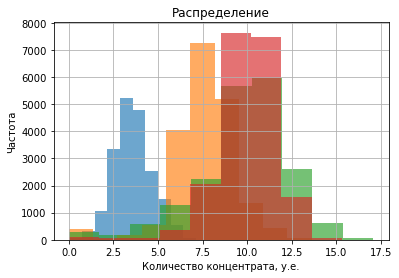

In [151]:
analysis_metal(pb)

Свинец итоговое 2,5 кратное увеличение концентрации, максимальный рост заметен на первом этапе обработки.

#### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках:

In [152]:
train_columns = train.columns

size_columns = [i for i in train_columns if 'feed_size' in i]
print(size_columns)

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']


In [153]:
size_train = train[size_columns]
size_test = test[size_columns]

display(size_train.head())


,primary_cleaner.input.feed_size,rougher.input.feed_size
0,7.25,55.486599
1,7.25,57.278666
2,7.25,57.510649
3,7.25,57.792734
4,7.25,56.047189


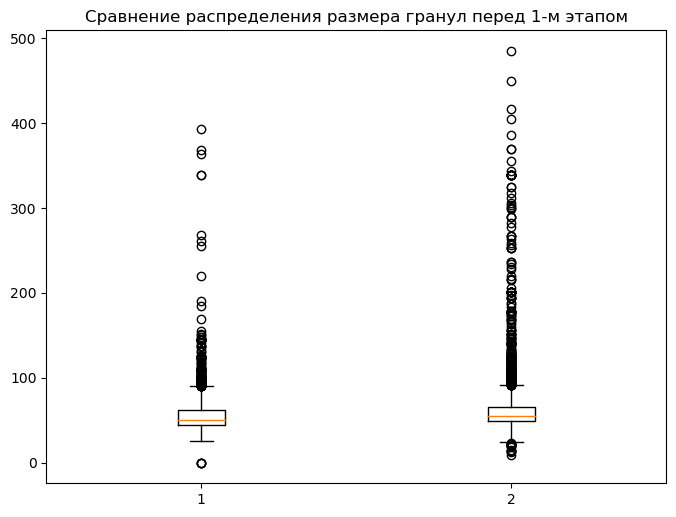

In [154]:
x1 = size_test['rougher.input.feed_size'] #тестовая выборка
x2 = size_train['rougher.input.feed_size'] #тренировочная выборка

figure(figsize=(8, 6), dpi=100)
plt.boxplot(([x1, x2]))
plt.title('Сравнение распределения размера гранул перед 1-м этапом')
plt.show()

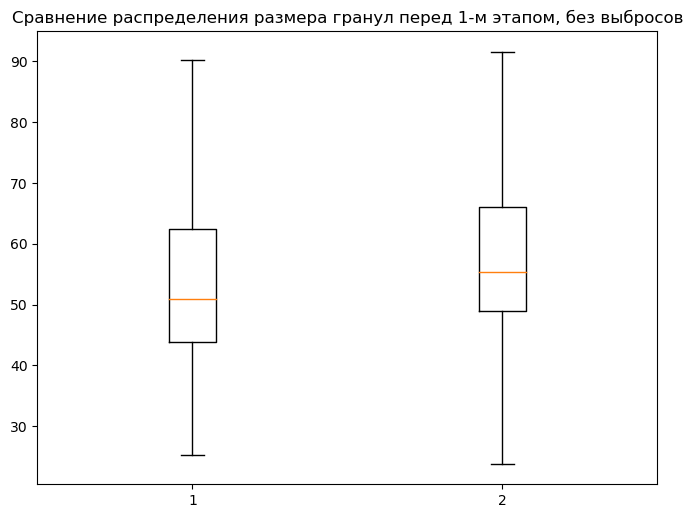

In [155]:
x1 = size_test['rougher.input.feed_size'] #тестовая выборка
x2 = size_train['rougher.input.feed_size'] #тренировочная выборка

figure(figsize=(8, 6), dpi=100)
plt.boxplot(([x1, x2]), showfliers=False)
plt.title('Сравнение распределения размера гранул перед 1-м этапом, без выбросов')
plt.show()

#### Вывод
Боксплоты данных графиков свидетельствуют, что размер граунл распределен примрерно равномерно.
Выбросы расположились схоже, при этом в тренировочной выборке выбросы расположились выше по графику, их немного, но все же. 

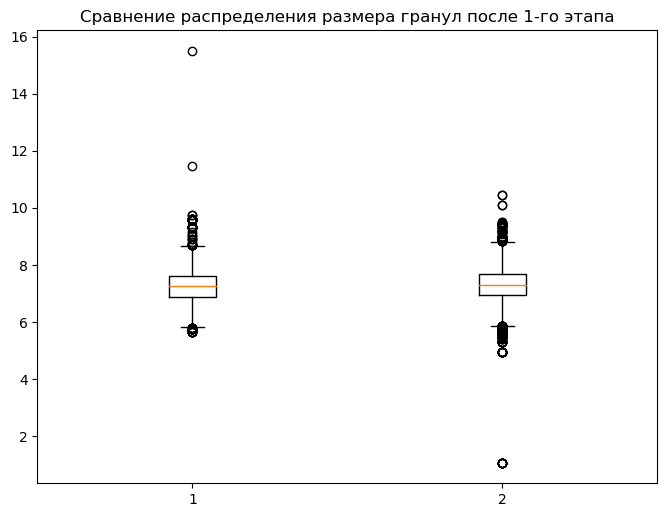

In [156]:
x1 = size_test['primary_cleaner.input.feed_size'] #тестовая выборка
x2 = size_train['primary_cleaner.input.feed_size'] #тренировочная выборка

figure(figsize=(8, 6), dpi=100)
plt.boxplot(([x1, x2]))
plt.title('Сравнение распределения размера гранул после 1-го этапа')
plt.show()

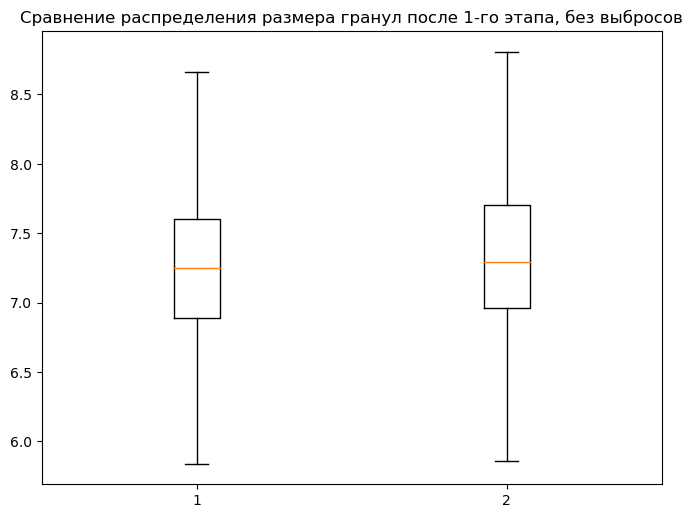

In [157]:
x1 = size_test['primary_cleaner.input.feed_size'] #тестовая выборка
x2 = size_train['primary_cleaner.input.feed_size'] #тренировочная выборка

figure(figsize=(8, 6), dpi=100)
plt.boxplot(([x1, x2]),  showfliers=False)
plt.title('Сравнение распределения размера гранул после 1-го этапа, без выбросов')
plt.show()

### Вывод
Здесь аналогичо, средние значения схожи, однако на тестовой выборке есть выбросы крупного размера, в то время как на тренировочной есть гранулы малого размера. 
Можно заключить, что для построения модели выборки подходят, но возможно потребуется удалить выбросы. 

## Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.


Всего у нас 4 элемента: золото, серебро, свинец и sol (соль?). Стадия сырья: все элементы с rougher.input.элемент - до флотации, черновой вариант - это все rougher.output.элемент - после флотации, но до первой очистки, а финальный концентрат - уже после 2х очисток, final.output.вещество .

In [158]:
columns_all = [i for i in full.columns if 'ag' in i or 'au' in i or 'pb' in i or 'sol' in i]
print(columns_all)
columns_all = [i for i in columns_all if 'rougher.input' in i or 'rougher.output' in i or 'final.output' in i]
print()
print(columns_all)
columns_all = [i for i in columns_all if 'tail' not in i]
print()
print(columns_all)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.tail_ag', 'rougher.output.tail_pb

In [159]:
elements_all = full[columns_all]
display(elements_all.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au
0,6.055403,9.889648,5.507324,42.192020,6.100378,2.284912,36.808594,6.486150,11.500771,7.101074,28.029297,19.793808
1,6.029369,9.968944,5.257781,42.701629,6.161113,2.266033,35.753385,6.478583,11.615865,7.278807,28.067063,20.050975
2,6.055926,10.213995,5.383759,42.657501,6.116455,2.159622,35.971630,6.362222,11.695753,7.216833,27.454037,19.737170
3,6.047977,9.977019,4.858634,42.689819,6.043309,2.037807,36.862241,6.118189,11.915047,7.175616,27.341277,19.320810
4,6.148599,10.142511,4.939416,42.774141,6.060915,1.786875,34.347666,5.663707,12.411054,7.240205,27.041023,19.216101


In [160]:
elements_all['input_all'] = elements_all['rougher.input.feed_ag']+elements_all['rougher.input.feed_pb']+elements_all['rougher.input.feed_sol']+elements_all['rougher.input.feed_au']
elements_all['output_all'] = elements_all['rougher.output.concentrate_ag']+elements_all['rougher.output.concentrate_pb']+elements_all['rougher.output.concentrate_sol']+elements_all['rougher.output.concentrate_au']
elements_all['final_all'] = elements_all['final.output.concentrate_ag']+elements_all['final.output.concentrate_pb']+elements_all['final.output.concentrate_sol']+elements_all['final.output.concentrate_au']

display(elements_all.head())

<ipython-input-160-fe5689846a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements_all['input_all'] = elements_all['rougher.input.feed_ag']+elements_all['rougher.input.feed_pb']+elements_all['rougher.input.feed_sol']+elements_all['rougher.input.feed_au']
<ipython-input-160-fe5689846a0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements_all['output_all'] = elements_all['rougher.output.concentrate_ag']+elements_all['rougher.output.concentrate_pb']+elements_all['rougher.output.concentrate_sol']

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,input_all,output_all,final_all
0,6.055403,9.889648,5.507324,42.192020,6.100378,2.284912,36.808594,6.486150,11.500771,7.101074,28.029297,19.793808,51.680034,66.424950,63.644396
1,6.029369,9.968944,5.257781,42.701629,6.161113,2.266033,35.753385,6.478583,11.615865,7.278807,28.067063,20.050975,50.659114,67.012710,63.957723
2,6.055926,10.213995,5.383759,42.657501,6.116455,2.159622,35.971630,6.362222,11.695753,7.216833,27.454037,19.737170,50.609929,66.103793,64.311180
3,6.047977,9.977019,4.858634,42.689819,6.043309,2.037807,36.862241,6.118189,11.915047,7.175616,27.341277,19.320810,51.061546,65.752751,63.573449
4,6.148599,10.142511,4.939416,42.774141,6.060915,1.786875,34.347666,5.663707,12.411054,7.240205,27.041023,19.216101,47.859163,65.908382,64.004667


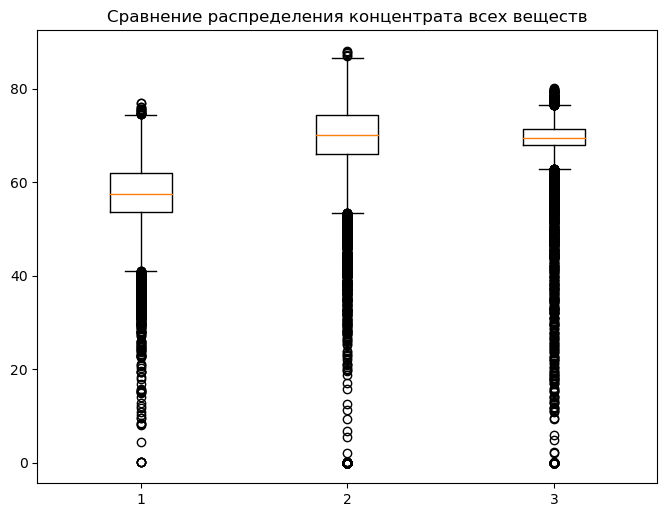

In [161]:
x1 = elements_all['input_all'] #сырье
x2 = elements_all['output_all'] #до обработки - черновое сырье
x3 = elements_all['final_all'] #финальный продукт

figure(figsize=(8, 6), dpi=100)
plt.boxplot(([x1, x2, x3]))
plt.title('Сравнение распределения концентрата всех веществ')
plt.show()

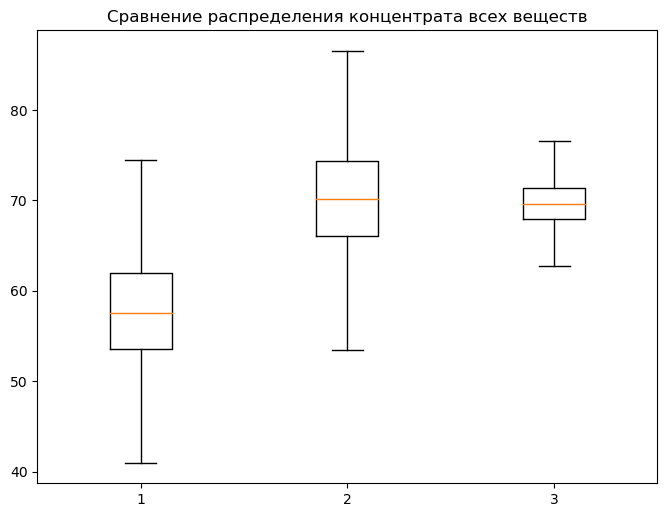

In [162]:
x1 = elements_all['input_all'] #сырье
x2 = elements_all['output_all'] #до обработки - черновое сырье
x3 = elements_all['final_all'] #финальный продукт

figure(figsize=(8, 6), dpi=100)
plt.boxplot(([x1, x2, x3]),showfliers=False)
plt.title('Сравнение распределения концентрата всех веществ')
plt.show()

Заметны аномалии, стоит построить гистограммы, чтобы понять границу значений, которые следует отсеять

<AxesSubplot:title={'center':'Изначальная концентрация продукта'}>

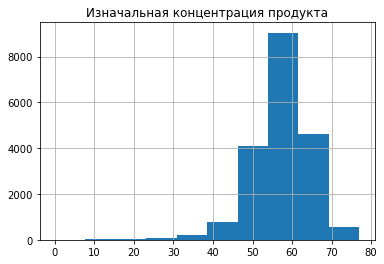

In [163]:
plt.title('Изначальная концентрация продукта')
x1.hist()

Требуется отбросить значения, меньше 38

<AxesSubplot:title={'center':'Концентрация после флоктации продукта'}>

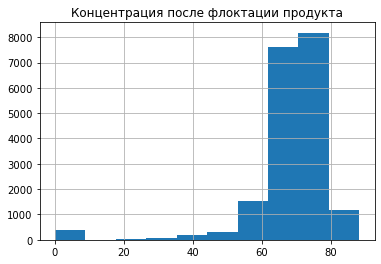

In [164]:
plt.title('Концентрация после флоктации продукта')
x2.hist()

Нужно отбросить значения, меньше 55

<AxesSubplot:title={'center':'Финальная концентрация продукта'}>

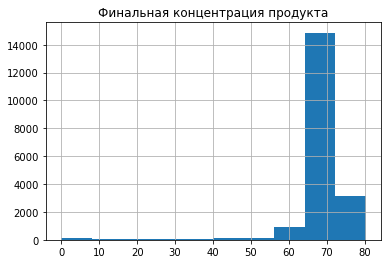

In [165]:
plt.title('Финальная концентрация продукта')
x3.hist()

Следует отбросить значения меньше 55

In [166]:
elements_all_cleared = elements_all.query('input_all>38 and output_all>55 and final_all>55')
print((len(elements_all_cleared)-len(elements_all))/len(elements_all))

-0.08431503678172746


Потеряли 8% строк, но удалили аномалии. 

In [167]:
print(features_train.shape)

full_cleared = full.query('index in @elements_all_cleared.index')
print((len(full)-len(full_cleared))/len(full))


(14149, 53)
0.08431503678172746


In [168]:
features_train_cleared = features_train.query('index in @elements_all_cleared.index')
test_cleared = test.query('index in @elements_all_cleared.index')
print(test.shape, test_cleared.shape)
print(features_train_cleared.shape)
print(features_train.shape)
print(features_train.shape)
print()
target_test_cleared = target_test.query('index in @elements_all_cleared.index')
print(target_test.shape)
print(target_test_cleared.shape)
print(test_cleared.shape)

(5290, 53) (4730, 53)
(12970, 53)
(14149, 53)
(14149, 53)

(5290, 2)
(4730, 2)
(4730, 53)


Потеряли много, но без аномалий. 

### Вывод
Был проведен анализ количества концентрата везеств на каждом этапе производства, также был произведен анализ сумм всех веществ в каждом их виде(типе), были выявлены и убраны аномалии. 

## Модель

#### Напишием функцию для вычисления итоговой sMAPE.

In [169]:
import numpy as np

def smape(true, pred):
    
    smape_rough = 100/len(true[:,0]) * np.sum(2 * np.abs(pred[:,0] - true[:,0]) / (np.abs(true[:,0]) + np.abs(pred[:,0])))
    smape_final = 100/len(true[:,1]) * np.sum(2 * np.abs(pred[:,1] - true[:,1]) / (np.abs(true[:,1]) + np.abs(pred[:,1])))
    
    smape_final = smape_rough*0.25 + smape_final*0.75
    
    return smape_final


#def sMAPE(true_rough, true_final, pred_rough, pred_final):
    
#    smape_rough = 100/len(true_rough) * np.sum(abs(true_rough - pred_rough) / (abs((true_rough) + abs(pred_rough))/2))
#    smape_final = 100/len(true_final) * np.sum(abs(true_final - pred_final) / (abs((true_final) + abs(pred_final))/2))
    
#    result = 0.25*smape_rough + 0.75*smape_final
    
#    return result

Разделим на выборки:

In [170]:
#подготовим целевые признаки обучающей выборки:


print(features_train.shape)
print(features_train_cleared.shape)



features_train_cleared = features_train_cleared.drop(columns=['date'], axis=1) 
print(features_train.shape)

print(features_train_cleared.shape)





(14149, 53)
(12970, 53)
(14149, 53)
(12970, 52)


In [171]:
print(test_cleared.shape)
test_cleared_1 = test_cleared.drop(columns=['date'], axis=1) 
print(test_cleared.shape)


(4730, 53)
(4730, 53)


Начинаем обучать модель

In [172]:
#создаем random_state

state = np.random.RandomState(10)

In [173]:
import scipy.stats as st
import re




from sklearn.metrics import SCORERS, make_scorer
from sklearn.metrics import mean_squared_error,  r2_score, roc_auc_score, roc_curve, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score






from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [174]:
smape_score = make_scorer(smape, greater_is_better=False)

In [175]:
#target_cleared = target.query('index in @elements_all_cleared.index')
#target_test_rough = test_with_target['rougher.output.recovery']
#target_test_final = test_with_target['final.output.recovery']

target_train_cleared = train[['rougher.output.recovery','final.output.recovery']].query('index in @elements_all_cleared.index')
#target_train_rought=train['rougher.output.recovery'].loc('index in @elements_all_cleared.index')
#target_train_final = train['final.output.recovery'].query('index in @elements_all_cleared.index')
print(target_train_cleared.shape)



(12970, 2)


In [176]:
target_train_cleared = target_train_cleared.reset_index(drop=True)
target_train_cleared.columns = [0, 1]


target_train_cleared = np.array(target_train_cleared)
print(target_train_cleared.shape)

(12970, 2)


In [177]:
model_LR = LinearRegression()
score = cross_val_score(model_LR, features_train_cleared, target_train_cleared, cv=5, scoring=smape_score)
print(score)

[-11.5273971   -8.3667875  -13.23993313 -11.54997547 -13.32530272]


In [178]:
#scores={}

#for n_estimator in range(1,200):
#    for min_samples_split in range (2,4):
#        model_TR = RandomForestRegressor(n_estimators  = n_estimator, max_depth=None,
#                                        min_samples_split=min_samples_split,
#                                        min_samples_leaf=1,
#                                        n_jobs=-1, random_state=state)
#        res = sum(cross_val_score(model_TR, features_train_cleared, target_train_cleared ,
#                         cv=5, scoring=smape_score)/5)
#        scores.update({(n_estimator,n_neighbor,min_samples_split):res})





Закомментировал, тк очень долго будет исполняться код, лучшая модель: n_estimators=100, min_samples_split=2, min_samples_leaf=4

In [179]:
model = RandomForestRegressor(random_state=state,n_estimators=100, min_samples_split=2, min_samples_leaf=4)

In [180]:
model.fit(features_train_cleared, target_train_cleared)

RandomForestRegressor(min_samples_leaf=4,
                      random_state=RandomState(MT19937) at 0x7FEBE851E940)

In [181]:
predictions = model.predict(test_cleared_1)

In [182]:
print(target_test_cleared.shape)
print(test_cleared_1.shape)
print(test_cleared.shape)

(4730, 2)
(4730, 52)
(4730, 53)


In [183]:
ans = smape(np.array(target_test_cleared),predictions)
print(ans)

10.507950155173532


### Вывод
Выполнен подбор и тестирование моделей.
Лучшей моделью был признан Случайный лес с параметрами
n_neighbors=100, mas_samples_leaf=4
На тестовой выборке удалость улучшить значение показателя sMAPE = 10.507950155173532


## Общий вывод

Изначально предоставленне расчеты метрики sMAPE были перепроверены, данные очищены, подготовлены для анализа, далее проанализированы, были выявлены и отброшены аномалии (было потеряно около 10% данных), после этого были обучены 2 модели и, ожидаемо, лучшей оказалась модель Случайного Леса. В итоге поставленная задача по предсказанию метрики sMAPE выполнена со значением: sMAPE = 9.777336376209565
